# Monday

### Virtual Environment and Request Module

### Sending A Request
- using the Github API

In [1]:
# ssending a request and logging the response code
import requests
r = requests.get('https://api.github.com/users/ajakaiye33')
print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


### Accessing the Response Content
- to access the content of the information captured in the r variable, we used the `content` method of request module

In [2]:
# accessing the content that we requested from the URL. 
# The output is in string format but we need to transform it into data
data = r.content
print(data)

b'{"login":"ajakaiye33","id":12386109,"node_id":"MDQ6VXNlcjEyMzg2MTA5","avatar_url":"https://avatars3.githubusercontent.com/u/12386109?v=4","gravatar_id":"","url":"https://api.github.com/users/ajakaiye33","html_url":"https://github.com/ajakaiye33","followers_url":"https://api.github.com/users/ajakaiye33/followers","following_url":"https://api.github.com/users/ajakaiye33/following{/other_user}","gists_url":"https://api.github.com/users/ajakaiye33/gists{/gist_id}","starred_url":"https://api.github.com/users/ajakaiye33/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/ajakaiye33/subscriptions","organizations_url":"https://api.github.com/users/ajakaiye33/orgs","repos_url":"https://api.github.com/users/ajakaiye33/repos","events_url":"https://api.github.com/users/ajakaiye33/events{/privacy}","received_events_url":"https://api.github.com/users/ajakaiye33/received_events","type":"User","site_admin":false,"name":"Hedgar ","company":null,"blog":"","location":"Earth, Milky

### Converting the Response
- the request object has a json() which help to convert strings to dictionary


In [3]:
# converting data from JSON into Python dictionary and outputting all key-value pairs
data = r.json() # converting the data from a string to a dictionary
for k, v in data.items():
    print(f'Key: {k} \t Value: {v}')
print(data['name']) # accessing the data directly


Key: login 	 Value: ajakaiye33
Key: id 	 Value: 12386109
Key: node_id 	 Value: MDQ6VXNlcjEyMzg2MTA5
Key: avatar_url 	 Value: https://avatars3.githubusercontent.com/u/12386109?v=4
Key: gravatar_id 	 Value: 
Key: url 	 Value: https://api.github.com/users/ajakaiye33
Key: html_url 	 Value: https://github.com/ajakaiye33
Key: followers_url 	 Value: https://api.github.com/users/ajakaiye33/followers
Key: following_url 	 Value: https://api.github.com/users/ajakaiye33/following{/other_user}
Key: gists_url 	 Value: https://api.github.com/users/ajakaiye33/gists{/gist_id}
Key: starred_url 	 Value: https://api.github.com/users/ajakaiye33/starred{/owner}{/repo}
Key: subscriptions_url 	 Value: https://api.github.com/users/ajakaiye33/subscriptions
Key: organizations_url 	 Value: https://api.github.com/users/ajakaiye33/orgs
Key: repos_url 	 Value: https://api.github.com/users/ajakaiye33/repos
Key: events_url 	 Value: https://api.github.com/users/ajakaiye33/events{/privacy}
Key: received_events_url 	 Val

### Passing Parameters



In [4]:
# outputting specific key-value pairs from data
# one way of passing parameter: `q='parameter'`
r = requests.get('https://api.github.com/search/repositories?q=language:python')
print(r)
data = r.json()
print(data['total_count']) # output the total number of repositories that use python


<Response [200]>
5724081


In [5]:
# exercise
# get the number of repositories in the javascript language
r = requests.get('https://api.github.com/search/repositories?q=language:javascript')
data = r.json()
print(data['total_count'])

7674470


# Tuesday

### Pandas
- Pandas is a better tool for data handling. Its essentially excel on steroids.
- Pandas is an intelligent fusion of the powers of python and `SQL`
- The usefulness of the pandas package are as follows:
    - Calculate statistics and answer questions about the data like average, median, max, and min of each column
    - Finding correlation between columns
    - Tracking the distribution of one or more columns
    - Visualizing the data with the help of maatplotlib, using plot, bar histograms, e.t.c
    - Cleaning and filtering data, whether it is missing or incomplete, just by applying a user-defined function(UDF) or built-in function
    - Transforming tabular data into python to work with
    - Exporting the data into a CSV, other file or database
    - Feature engineer new columns that can be applied to your analysis

### Key Terms
- `Series`: one-dimensional labeled array capable of holding data of any type
- `DataFrame`:spreadsheet
- `Axis`: Column or row, axis=0 by row; axis= 1 by column
- `Record`: A single row
- `dtype`: Data type for Dataframe or series object
- `Time Series`: Series object that uses time intervals like tracking weather by the hour

### Importing Pandas


In [6]:
# importing the pandas package
import pandas as pd # industry standard name of pd when importing

### Creating A Dataframe
- Pandas dataframe is a tabular data structure with rows and columns like an excel spreadsheet

In [7]:
# using the from_dict method to convert a dictionary into a Pandas Dataframe
import random
random.seed(3) # generate same random numbers every time, number used doesn't matter
names = ['Jess', 'Jordan', 'Sandy', 'Ted', 'Barney','Tyler', 'Rebecca']
age = [random.randint(18, 35) for x in range(len(names))]
people = {'names':names, 'ages':age}
df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


### Accessing Data


#### Indexing by Column
- This is the same as accessing data in a dictionary with key

In [8]:
# directly selecting a column in pandas
print(df['ages'])

0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64


In [9]:
print(df['ages'][3]) # select the value of ages in the fourth row (0- index based)
# print(df[4]) doesn't work, 4 is not a column name

29


#### Indexing by Record
- we use `loc` to access an entire record


In [10]:
# directly selecting a record in pandas using .loc
print(df.loc[0])
print(df.loc[0]['names']) # selecting the value at record 0 in the 'names column'

names    Jess
ages       25
Name: 0, dtype: object
Jess


### Slicing a DataFrame
- works the same way as python list: `start`,`stop`,`step`

In [11]:
# slicing a DataFrame to grab specific records
print(df[2:5])

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


### Built-in Methods

#### head()

In [12]:
# accessing the top 5 records using .head()
df.head()

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


#### tail()

In [13]:
# accesing the bottom 3 records using .tail()
df.tail()

,names,ages
2,Sandy,22
3,Ted,29
4,Barney,33
5,Tyler,20
6,Rebecca,18


#### key()

In [14]:
# accessing the column header (keys) using the .keys() method
header = df.keys()
print(header)

Index(['names', 'ages'], dtype='object')


#### .shape

In [15]:
# checking the shape, which is the number of records and columns
print(df.shape)

(7, 2)


#### describe()
- `min`, `max`, `25%`, `50%`, `mean`

In [16]:
# checking the general statistics of the dataframe using .describe() only on numerical columns
df.describe()

,ages
count,7.000000
mean,26.000000
std,6.531973
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,35.000000


#### sort_values()

In [17]:
## sort based on a given column, but keep the DataFrame in tact using sort_values()
df = df.sort_values('ages')
df.head()

,names,ages
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29


### Filtration

#### Conditionals

In [18]:
# using a conditional to create a true/false column to work with
can_drink = df['ages'] > 21
print(can_drink)

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


#### Subsetting

In [19]:
# using sunsetting to filter out records and keep dataframe intact
df[df['ages'] > 21]

,names,ages
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


### Colum Transformations

#### Generating a New Column with Data
- its is done in same way as adding a new key-value pair into a dictionary

In [20]:
# generating a new column of fake data for each record in dataframe represent customer tenure
random.seed(321)
tenure = [random.randint(0,10) for x in range(len(df))]
df['tenure'] = tenure # same as adding a new key-value pair in a dictionary
df.head()

,names,ages,tenure
6,Rebecca,18,4
5,Tyler,20,6
2,Sandy,22,2
0,Jess,25,5
3,Ted,29,8


#### apply()
- critical to `feature engineering`

In [21]:
# feature engineering a new column from known data using UDF
def ageGroup(age):
    return 'Teenager' if age < 21 else 'Adult'
df['age_group'] = df['ages'].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


### Aggregation
- similar to the groupby() function of SQL


#### groupby()


In [22]:
# grouping the records together to count how many records in each group
df.groupby('age_group', as_index=False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenager,2,2,2


#### mean()


In [23]:
# grouping the data to see average of all columns
df.groupby('age_group', as_index=False).mean().head()

,age_group,ages,tenure
0,Adult,28.8,5.4
1,Teenager,19.0,5.0


#### groupby() with Multiple Columnm


In [24]:
# grouping information by their age group, then by their tenure
df.groupby(['age_group', 'tenure'], as_index=False).count().head()

,age_group,tenure,names,ages
0,Adult,2,1,1
1,Adult,5,2,2
2,Adult,7,1,1
3,Adult,8,1,1
4,Teenager,4,1,1


In [25]:
df.groupby(['age_group', 'tenure']).agg({'tenure':'count'})

tenure
age_group tenure        
Adult     2            1
          5            2
          7            1
          8            1
Teenager  4            1
          6            1

### Adding a Record


In [26]:
# adding a record to the bottom of the Dataframe
df.loc[7] = [25, 'Jess', 2, 'Adult'] # add a record
df.head()

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult


#### drop_duplicates()


In [27]:
# removing duplicates based on same names
df = df.drop_duplicates(subset='names')
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult
7,25,Jess,2,Adult


### Pandas Joins
- like SQL pandas uses the join function to combine data from different dataframe

#### Creating a Second DataFrame


In [28]:
# creating another fake DataFrame to work with, having same names and a new ratings colums
ratings ={
    'names':['Jess', 'Tyler', 'Ted'], 'ratings' : [10,9,6]
}
ratings = df.from_dict(ratings)
ratings.head()

,names,ratings
0,Jess,10
1,Tyler,9
2,Ted,6


#### Inner Join

In [29]:
# perform an inner join with our df and ratings datframe based on names, get data that matches
matched_ratings = df.merge(ratings, on='names', how='inner')
matched_ratings.head()

,names,ages,tenure,age_group,ratings
0,Tyler,20,6,Teenager,9
1,Jess,25,5,Adult,10
2,Ted,29,8,Adult,6


#### Outer Join

In [30]:
# performing an outer loin with our df and ratings Dataframe based on names, get all the data
all_ratings = df.merge(ratings, on='names', how='outer')
all_ratings.head()

,names,ages,tenure,age_group,ratings
0,Rebecca,18,4,Teenager,NaN
1,Tyler,20,6,Teenager,9.0
2,Sandy,22,2,Adult,NaN
3,Jess,25,5,Adult,10.0
4,Ted,29,8,Adult,6.0


### Dataset Pipeline
- Performing Exploratory Analysis
- Data Cleaning
- Feature Engineering

# Wednesday

## Data Visualization
- visualization are veritable tool for discerning patterns within data
- Its also an excellent tool for communication

### Types of Chart
- *Line Chart*: Exploring data over time
- *Bar Chart*: Comparing categories of data and tracks changes over time
- *Pie Chart*: Explores parts of a whole, that is fractions
- *Scatter Plot*: Like line charts, tracks correlations between two categories
- *Histogram*: Unrelated from bar chart, shows distribution of variables
- *Candlestick chart*: Used a lot in financial sector, that is can compare a stock over a period
- *Box Chart*: Looks identical to candlestick charts and compares minimum 1st, median 3rd quartiles and max value

### Importing Matplotlib


In [31]:
# importing the matplotlib library from matplotlib
import matplotlib.pyplot as plt

### Line Plot

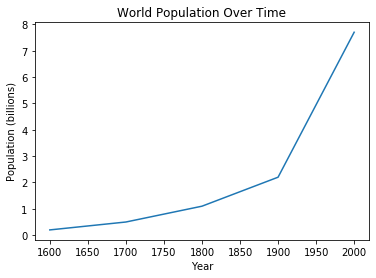

In [32]:
# creating a line plot using x and y coords
x, y = [1600,1700,1800,1900,2000], [0.2, 0.5, 1.1, 2.2,7.7]
plt.plot(x,y)
plt.title('World Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.show()

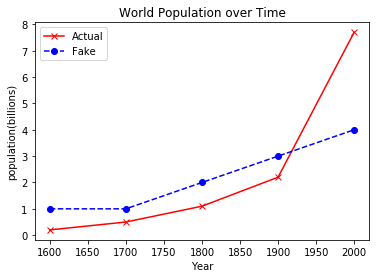

In [33]:
# creating a line plot with multiple lines
x1, y1 = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
x2, y2 = [1600, 1700, 1800, 1900, 2000], [1,1,2,3,4]
plt.plot(x1,y1,'rx-', label='Actual')
plt.plot(x2,y2, 'bo--', label='Fake')
plt.title('World Population over Time')
plt.xlabel('Year')
plt.ylabel('population(billions)')
plt.legend() # shows labels in best corner
plt.show()

### Bar Plot


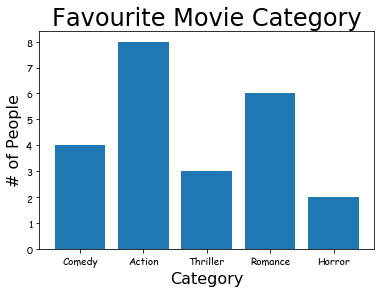

In [34]:
# creating a bar plot using x and y coords
num_people, categories = [4, 8, 3, 6, 2], ['Comedy', 'Action', 'Thriller', 'Romance', 'Horror']
plt.bar(categories, num_people)
plt.title('Favourite Movie Category', fontsize=24)
plt.xlabel('Category', fontsize=16)
plt.ylabel('# of People', fontsize=16)
plt.xticks(fontname='Fantasy')
plt.yticks(fontname='Fantasy')
plt.show()

### Box Plot


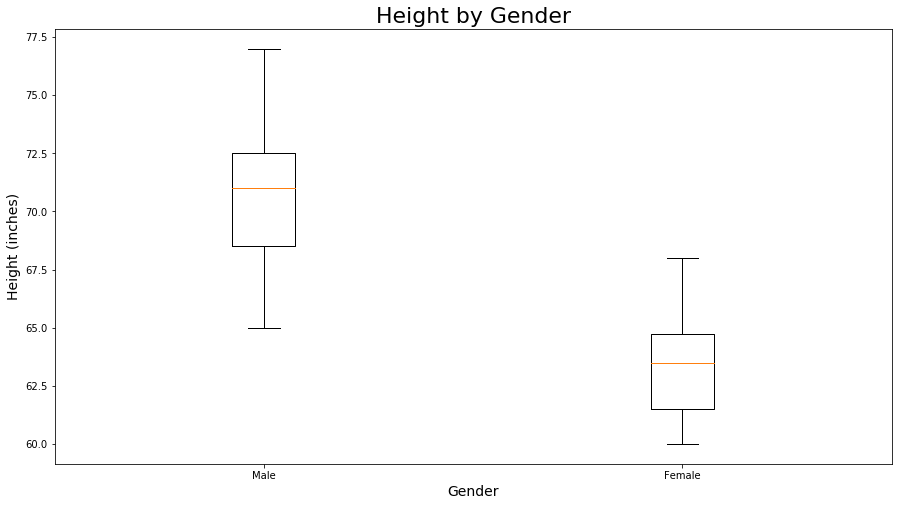

In [35]:
# creating a box plot - showing height data for male-female
males, females = [72, 68, 65, 77, 73, 71, 69], [60, 65, 68, 61, 63, 64]
heights = [males, females]
plt.figure(figsize=(15,8)) # makes chart bigger
plt.boxplot(heights)
plt.xticks([1,2], ['Male', 'Female'])
plt.title('Height by Gender', fontsize=22)
plt.ylabel('Height (inches)', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.show()

### Scatter Plot

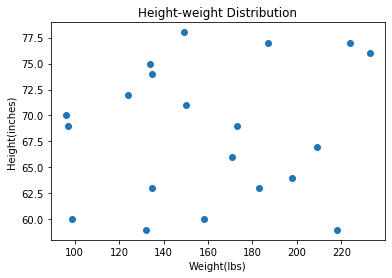

In [36]:
# creating a scatter plot to  represent height-weight distribution
from random import randint
random.seed(2)
height = [randint(58,78)for x in range(20)]
weight = [ randint(90, 250) for x in range(20)]
plt.scatter(weight,height)
plt.title('Height-weight Distribution')
plt.xlabel('Weight(lbs)')
plt.ylabel('Height(inches)')
plt.show()

### Histogram

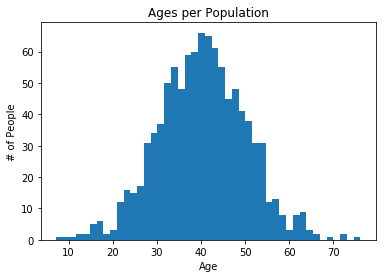

In [37]:
# creating a histogram to show age data for a fake population
import numpy as np
np.random.seed(5)
ages = [np.random.normal(loc=40, scale=10) for x in range(1000)] # ages distributed around 40
plt.hist(ages, bins=45)
plt.title('Ages per Population')
plt.xlabel('Age')
plt.ylabel('# of People')
plt.show()

### Importance of Histogram Distribution


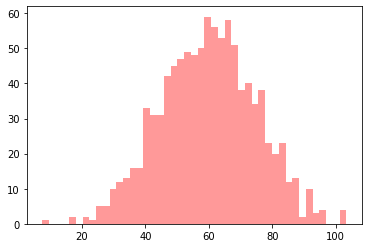

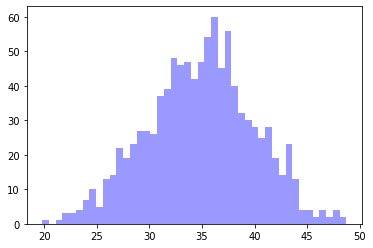

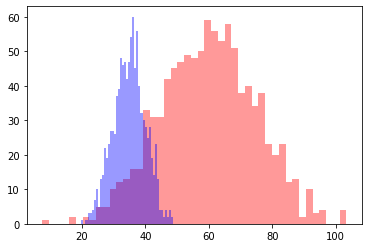

In [38]:
# showing the importance of histgram's display central distribution
florida = [np.random.normal(loc=60, scale=15) for x in range(1000)] # assume numpy is imported
california = [np.random.normal(loc=35, scale=5) for x in range(1000)]
plt.hist(florida, bins=45, color='r', alpha=0.4) # alpha is opacity, making it see through
plt.show()
#chart2
plt.hist(california, bins=45, color='b', alpha=0.4) # alpha is opacity, making it see through
plt.show()
#chart 3
plt.hist(florida, bins=45, color='r', alpha=0.4)
plt.hist(california, bins=45, color='b', alpha=0.4) # alpha is opacity, making it see through
plt.show()

### Saving The Chart
by using the savefig() function

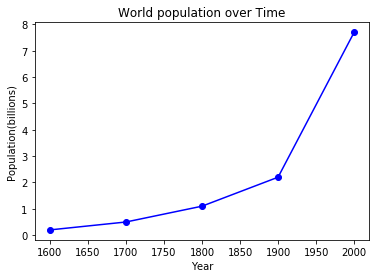

In [39]:
# using savefig method to save the chart as a jpg to the local folder
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
plt.plot(x,y, 'bo-') # creates a blue solid line with circle dots
plt.title('World population over Time')
plt.xlabel('Year')
plt.ylabel('Population(billions)')
plt.savefig('population.jpg')

### Flattening Multidimensional Data

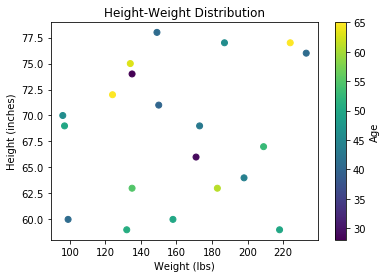

In [40]:
#creating a scatter plot to represent height-weight distribution
from random import randint
random.seed(2)
height = [randint(58, 78) for x in range(20)]
weight = [randint(90, 250) for x in range(20)]
age = [randint(18, 65) for x in range(20)] # 20 records between 18 and 65 years old
plt.scatter(weight, height, c=age)
plt.title('Height-Weight Distribution')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (inches)')
plt.colorbar(label='Age')
plt.show()

# Thursday

### Web scraping
- involves two parts:
  - sending out requests (use the request module)
  - parsing the data (use beautiful soup package)

### Importing Beautiful Soup


In [41]:
# importing the beautiful soup and requests
from bs4 import BeautifulSoup
import  requests

### Requesting Page Content

In [42]:
# perfroming a request and outputting the status code
page = requests.get('http://www.arthurleej.com/e-love.html')
print(page)
## outputting the request response content
print(page.content)

<Response [200]>
b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\r<html>\r<head>\r\t<title>Essay on Love by Arthur Lee Jacobson</title>\r<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\r<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\r<meta name="resource-type" content="document">\r<meta name="generator" content="BBEdit 4.5">\r<meta name="robots" content="all">\r<meta name="classification" content="Gardening">\r<meta name="distribution" content="global">\r<meta name="rating" content="general">\r<meta name="copyright" content="2001 Arthur Lee Jacobson">\r<meta name="author" content="eriktyme@eriktyme.com">\r<meta name="language" content="en-us">\r</head>\r<body background="images/background1a.jpg" bgcolor="#FFFFCC" text="#

### Passing the Response with Beautiful Soup
- Beautiful soup come with a lot methods and function that make it easy to traverse and handle the content. A soup object is created and the content of the page is  and the type of parser are passed as arguments

In [43]:
# turning the response into beautiful object to extract data
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

### Scraping Data
- some of the main method that come handing when parsing data are as follows:


#### .find()
- output single tag and it contents

In [44]:
# Using the find method to scrape the text within the first bold tag
title = soup.find('b')
print(title)
print(title.get_text()) # extract all text within element

<b>Love</b>
Love


#### find_all()
- output a collection of tags and their content

In [45]:
# get all text within the bold element tag then output each
poem_text = soup.find_all('b')
for text in poem_text:
    print(text.get_text())

Love
    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?
    Love in its broad sense is the feeling of strong attraction, and often attachment and protection. It is felt towards other people, towards pets, towards inanimate objects, towards abstractions such as patriotism, religious matters, hobbies, and I suppose nearly everything. It is multifaceted, and includes ordinary self-love, chivalrous love, carnal or sexual love, friendly love, family love. It is an emotion that is closely related to certain others, such as hope. At its simplest level it is what we strongly like.
    I have a hunch that love, like the rose, owes much of its appeal to our mainstre

### Finding Elements By Attributes
- Using `id`, `class` to catch content

In [46]:
# Finding an element by specific attributes key-value
page = requests.get('https://github.com/Connor-SM')
soup = BeautifulSoup(page.content, 'html.parser')
username = soup.find('span', attrs={'class':'vcard-username'}) # find first span with this
print(username) # will show that element has class of vcard-username among other
print(username.get_text())

<span class="p-nickname vcard-username d-block" itemprop="additionalName">Connor-SM</span>
Connor-SM


### Dom Traversal
- getting content by traversing through the dom= Document Object Model
  1. Parent-Child
  2. Sibling
  3. Grandparent-Grandchild

### Accessing the Children Attribute

In [47]:
# traversing through the Dom using Beautiful Soup - using the children attribute
page = requests.get('http://www.arthurleej.com/e-love.html')
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.children) # outputs an iterator object

### Understanding the Type of Children

In [48]:
# understanding the children within the soup object
for child in list(soup.children):
    print(type(child))

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


### Accessing the tag Object

In [49]:
# accessing the .Tag object which holds the html- trying to access the title tag
html = list(soup.children)[2]
for section in html:
    print('\n\n Start of new section')
    print(section)



 Start of new section
 


 Start of new section
<head> <title>Essay on Love by Arthur Lee Jacobson</title> <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/> <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/> <meta content="document" name="resource-type"/> <meta content="BBEdit 4.5" name="generator"/> <meta content="all" name="robots"/> <meta content="Gardening" name="classification"/> <meta content="global" name="distribution"/> <meta content="general" name="rating"/> <meta content="2001 Arthur Lee Jacobson" name="copyright"/> <meta content="eriktyme@eriktyme.com" name="author"/> <meta content="en-us" name="language"/> </head>


 Start of new section
 


 Start of new section
<body alink="#33CC33" background="images/background1a.jpg

### Accessing the Head Element Tag

In [50]:
# Accessing the Head Element using the children attribute
head = list(html.children)[1]
for item in head:
    print('\n\n New Tag')
    print(item)



 New Tag
 


 New Tag
<title>Essay on Love by Arthur Lee Jacobson</title>


 New Tag
 


 New Tag
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>


 New Tag
 


 New Tag
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>


 New Tag
 


 New Tag
<meta content="document" name="resource-type"/>


 New Tag
 


 New Tag
<meta content="BBEdit 4.5" name="generator"/>


 New Tag
 


 New Tag
<meta content="all" name="robots"/>


 New Tag
 


 New Tag
<meta content="Gardening" name="classification"/>


 New Tag
 


 New Tag
<meta content="global" name="distribution"/>


 New Tag
 


 New Tag
<meta content="general" name="rating"/>


 New Tag
 


 New Tag
<meta content="2001 Arthur Lee Jacobson" name="copyright"/>


 New Tag
 


 New Tag
<m

### Scraping the Title Text
- extract the text from the tag

In [51]:
# scraping the title text
title = list(head)[1]
print(title.string)
print(type(title.string))
print(title.get_text())

Essay on Love by Arthur Lee Jacobson
<class 'bs4.element.NavigableString'>
Essay on Love by Arthur Lee Jacobson


In [52]:
# exercise
page = requests.get('http://www.york.ac.uk/teaching/cws/wws/webpage1.html')
print(page.content)

b'<HMTL>\n<HEAD>\n<TITLE>webpage1</TITLE>\n</HEAD>\n<BODY BGCOLOR="FFFFFf" LINK="006666" ALINK="8B4513" VLINK="006666">\n<TABLE WIDTH="75%" ALIGN="center">\n<TR>\n<TD>\n<DIV ALIGN="center"><H1>STARTING . . . </H1></DIV>\n\n\n<DIV ALIGN="justify"><P>There are lots of ways to create web pages using already coded programmes. These lessons will teach you how to use the underlying HyperText Markup Language -  HTML. \n<BR>\n<P>HTML isn\'t computer code, but is a language that uses US English to enable texts (words, images, sounds) to be inserted and formatting such as colo(u)r and centre/ering to be written in. The process is fairly simple; the main difficulties often lie in small mistakes - if you slip up while word processing your reader may pick up your typos, but the page will still be legible. However, if your HTML is inaccurate the page may not appear - writing web pages is, at the least, very good practice for proof reading!</P>\n\n<P>Learning HTML will enable you to:\n<UL>\n<LI>creat

In [59]:
soup = BeautifulSoup(page.content, 'html.parser')
text = soup.find_all('p')
entry = []
for i in text:
    entry.append(i.get_text())
print(entry)

["There are lots of ways to create web pages using already coded programmes. These lessons will teach you how to use the underlying HyperText Markup Language -  HTML. \n\nHTML isn't computer code, but is a language that uses US English to enable texts (words, images, sounds) to be inserted and formatting such as colo(u)r and centre/ering to be written in. The process is fairly simple; the main difficulties often lie in small mistakes - if you slip up while word processing your reader may pick up your typos, but the page will still be legible. However, if your HTML is inaccurate the page may not appear - writing web pages is, at the least, very good practice for proof reading!\nLearning HTML will enable you to:\n\ncreate your own simple pages\nread and appreciate pages created by others\ndevelop an understanding of the creative and literary implications of web-texts\nhave the confidence to branch out into more complex web design \n\nA HTML web page is made up of tags. Tags are placed in